### **0. Preparation**

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import math
from collections import deque
from google.colab import files
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

### **1. Input Data**

In [27]:
uploaded = files.upload()

Saving data.csv to data (1).csv


[ -5.51841  -18.426116]


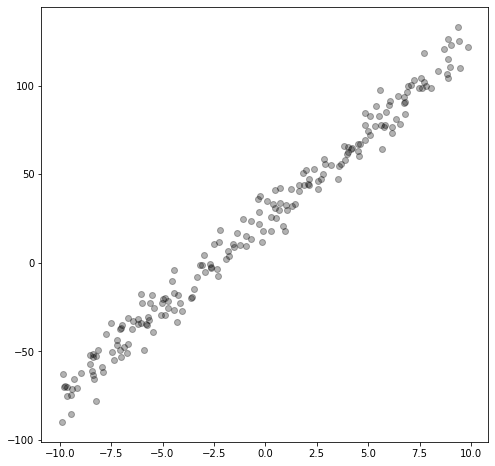

In [50]:
dataset = np.loadtxt("data.csv", delimiter = ",")

x_data = dataset[:,0]
y_data = dataset[:,1]
size_data = len(x_data) #200
#print("Xdata",x_data)
#print("Ydata", y_data)
plt.figure(figsize = (8,8))
plt.scatter(x_data, y_data, alpha = 0.3, color = 'k')
plt.show()

### **2. Linear Regression**

In [0]:
def ObjectiveFunction(m, b):
  #print(m)
  cost = 0
  predictions = []
  for i in range(0, 200):
    predictions.append(m * x_data[i] + b)
    #print("m의 값",m)
    #r = y_data[i]
  cost = np.sum(np.square(predictions - y_data)) / 400
  #print("Cost",i,"번째",cost)
  return cost

In [0]:
def gradientDescent(m, b):
  for i in range(0, 200):
    h = m * x_data[i] + b
    #r = y_data[i]
    lr = 0.003
    b -= lr * (h - y_data[i]) / 200
    m -= lr * x_data[i] * (h-y_data[i]) / 200
  return m, b

Plotting the Linear Regression Results


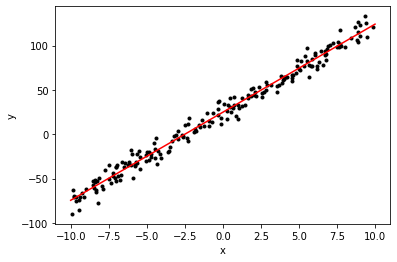

Plotting the Energy Surface


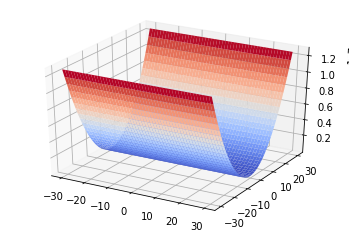

In [70]:
def main():
  #print("x", x)
  #print("y", y)
  m = -30
  b = -30   ##initialization
  costs = deque()
  bs = deque()
  ms = deque()
  iters = deque()


  for iter in range(0, 5000):
    value_Object = ObjectiveFunction(m, b)
    m, b = gradientDescent(m, b)
    #print("cost", value_Object)
    #print("절편b",b)
    #print("기울기m",m)

    #data수집을 위해 deque 자료구조를 이용해 저장!
    iters.append(iter)
    costs.append(value_Object)
    bs.append(b)
    ms.append(m)

  #print("iters, costs, ms, bs",iters, costs, ms, bs)
  #print("m, b",m,b)

  print("Plotting the Linear Regression Results")
  fig = plt.figure()

  graph3 = plt.plot(x_data, y_data, '.k') #기존 data

  real = np.linspace(-10,10,21)
  graph4 = plt.plot(real, m * real + b, 'r') #linear regression
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()
  """
  print("Plotting the Energy Values")
  plt.plot(iters, costs, 'b')
  plt.xlabel('iteration')
  plt.ylabel('energy value')
  plt.show()

  print("Plotting the Model Parameters")
  fig = plt.figure()
  graph5 = plt.plot(iters, bs, 'r')
  graph6 = plt.plot(iters, ms, 'b')
  plt.xlabel('iteration')
  plt.ylabel('parameter')
  plt.show()
  """
  print("Plotting the Energy Surface")
  fig = plt.figure()
  ax = fig.gca(projection = '3d')
  
  
  X = np.arange(-30, 30, 0.1)
  Y = np.arange(-30, 30, 0.1)
  X, Y = np.meshgrid(X,Y)
  """
  for i in range(0, 200):
    predictions.append(m * x_data[i] + b)
    #print("m의 값",m)
    #r = y_data[i]
  cost = np.sum(np.square(predictions - y_data)) / 400
  
  ax.plot_surface(X,Y,cost, color = 'g')
  """

  for i,j in dataset:
    #print("i,j",i,j)
    scalar1 = np.full((600,600), i)
    scalar2 = np.full((600,600), j)
    Z = np.square(np.subtract(np.add(X, np.matmul(Y, scalar1)),scalar2)) / 400 # np.sum(np.square(X + Y * x_data  - y_data)) / 400
    #print(Z.shape)
    #Z = np.expand_dims(Z,axis=0)
    #print(Z.shape)
  surface = ax.plot_surface(X, Y, Z, cmap = cm.coolwarm)
  #ax.set_zlim(0.00, 2.00)
  #ax.zaxis.set_major_locator(LinearLocator(10))
  #ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
  plt.show()
  

if __name__ == "__main__":
  main()